# Students Performance Data Analysis
In this Notebook, exam performances of 1000 students are analyzed with factors that effects these results.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

## Creating and reconfiguring dataframe

### Import the data from CSV file and look for the shape of dataframe.

In [2]:
students_df = pd.read_csv('StudentsPerformance.csv')
students_df.shape

(1000, 8)

### Take a look at the first 10 values and collumns.

In [3]:
students_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Change the collumn names for better syntax.

In [4]:
#Rename collumns for better use.
students_df.rename({'race/ethnicity':'race_ethnicity','parental level of education' : 'parental_education', 'test preparation course': 'test_prep_course', 'math score':'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'}, axis=1, inplace= True)

### Categorize the collumns with string data type.

In [5]:
students_df.gender = students_df.gender.astype('category')
students_df.race_ethnicity = students_df.race_ethnicity.astype('category')
students_df.parental_education = students_df.parental_education.astype('category')
students_df.lunch = students_df.lunch.astype('category')
students_df.test_prep_course = students_df.test_prep_course.astype('category')

### Take a look at the outline of the dataframe

In [6]:
students_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Check the null values.

In [7]:
students_df.isnull().sum()

gender                0
race_ethnicity        0
parental_education    0
lunch                 0
test_prep_course      0
math_score            0
reading_score         0
writing_score         0
dtype: int64

Dataset is very clean and organized as it can be seen from that there are no null values. 

### Check that if there is any type errors in the categorical collumns

In [8]:
students_df.gender.unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [9]:
students_df.race_ethnicity.unique()

['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group B', 'group C', 'group A', 'group D', 'group E']

In [10]:
students_df.parental_education.unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']

In [11]:
students_df.lunch.unique()

['standard', 'free/reduced']
Categories (2, object): ['standard', 'free/reduced']

In [12]:
students_df.test_prep_course.unique()

['none', 'completed']
Categories (2, object): ['none', 'completed']

There are no type errors as it can be seen from the above lines. Categories are correct.

### Check if there are any negative values or values that are more than 100.


In [13]:
students_df[(students_df.math_score < 0) | (students_df.math_score > 100)].math_score.count()

0

In [14]:
students_df[(students_df.reading_score < 0) | (students_df.reading_score > 100)].reading_score.count()

0

In [15]:
students_df[(students_df.writing_score < 0) | (students_df.writing_score > 100)].writing_score.count()

0

There are no values that are less than 0 or greater than 100 as we it can be seen

## Exploring Data

### Take a look at the histograms for the numerical collumns.

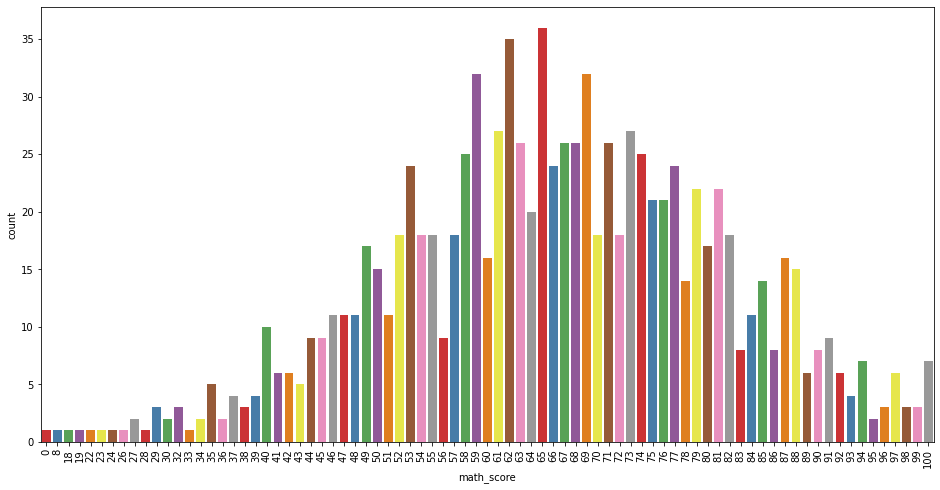

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(data = students_df, x='math_score', palette='Set1')
plt.xticks(rotation='vertical');

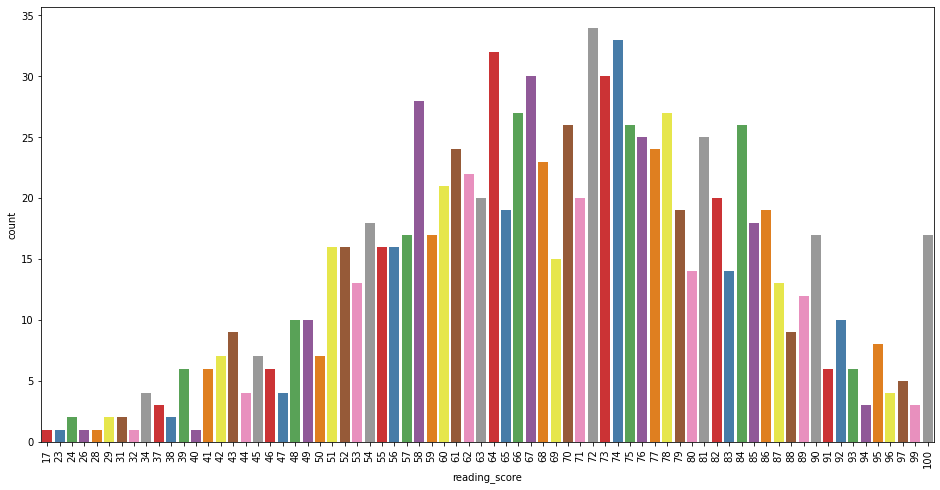

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(data = students_df, x='reading_score', palette='Set1')
plt.xticks(rotation='vertical');

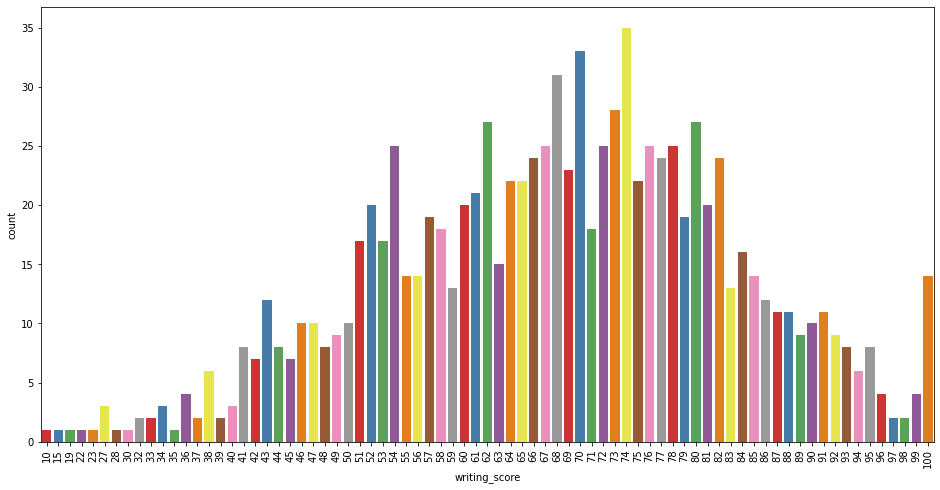

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(data = students_df, x='writing_score', palette='Set1')
plt.xticks(rotation='vertical');

As it can be seen, numerical data are slightly left skewed. Grades are generally around 60-80 points.

### Exploring the categories


Let's see the distribution of the categories.

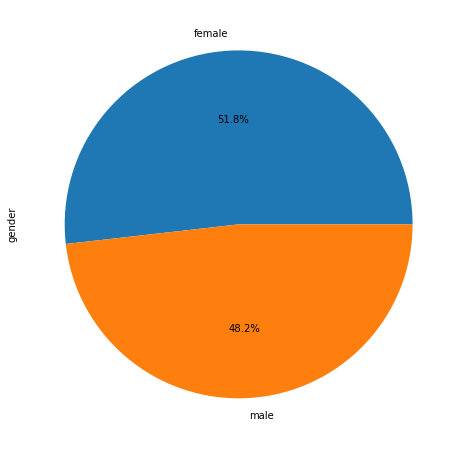

In [19]:
plt.figure(figsize=(16,8))
students_df.groupby('gender').gender.count().plot.pie(autopct='%.1f%%');

Dataset has an even distribution of genders.

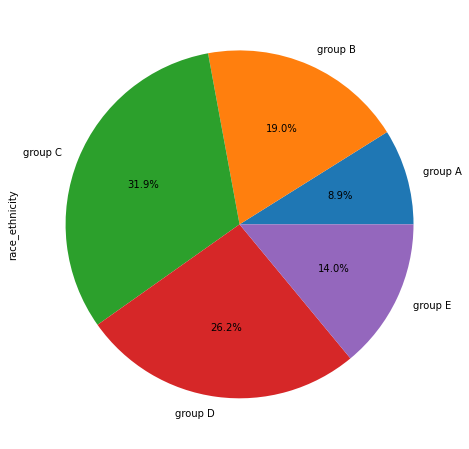

In [20]:
plt.figure(figsize=(16,8))
students_df.groupby('race_ethnicity').race_ethnicity.count().plot.pie(autopct='%.1f%%');

Group C and Group D are the are the most populated race/ethnicity groups. Group A is rarer.

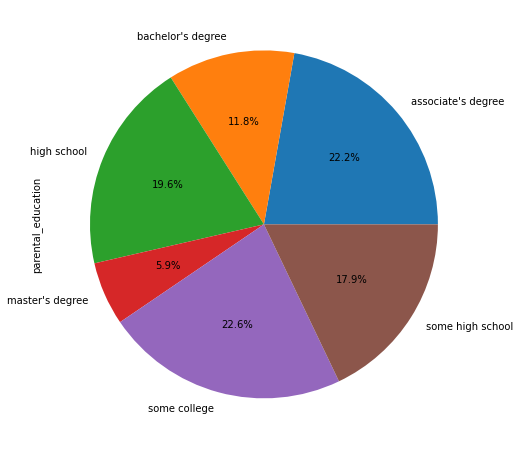

In [21]:
plt.figure(figsize=(16,8))
students_df.groupby('parental_education').parental_education.count().plot.pie(autopct='%.1f%%');

Most of the parents are college or high school graduated

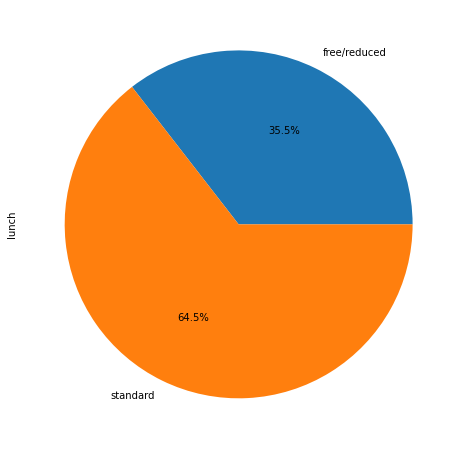

In [22]:
plt.figure(figsize=(16,8))
students_df.groupby('lunch').lunch.count().plot.pie(autopct='%.1f%%');

Students that have standard lunch are more populated.

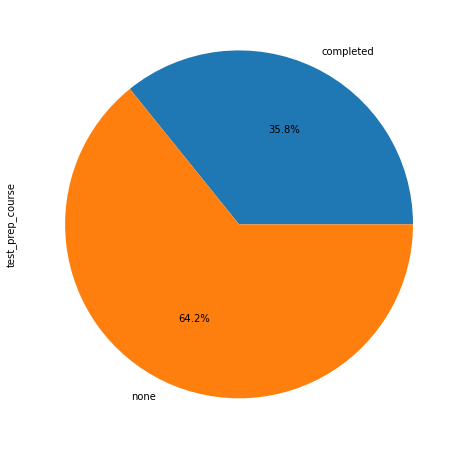

In [23]:
plt.figure(figsize=(16,8))
students_df.groupby('test_prep_course').test_prep_course.count().plot.pie(autopct='%.1f%%');

There are more students that didn't have the preparation courses.

## Which conditions effect the performance.

### Scores by Gender

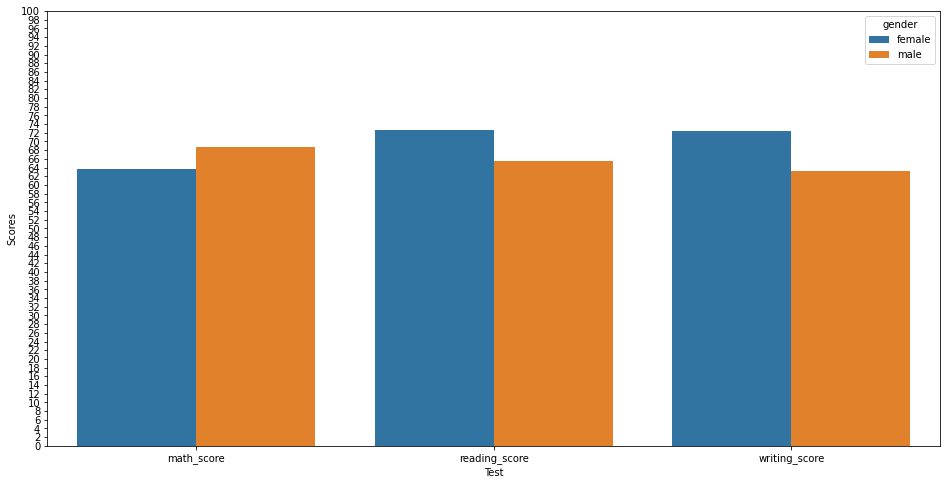

In [41]:
plt.figure(figsize=(16,8))
data = students_df.groupby('gender').mean().reset_index().melt(id_vars=['gender'],value_name='Scores', var_name='Test')
ax = sns.barplot(data= data, x='Test', y='Scores', hue='gender')
ax.set(ylim=(0,100))
ax.set_yticks(range(0,101,2));

- Math Scores <br>
    As it can be seen, male students have better math scores than females by mean.
- Reading Scores <br>
    As it can be seen, female students have better reading scores than males by mean.
- Writing Scores <br>
    As it can be seen, female students have better math scores than males.

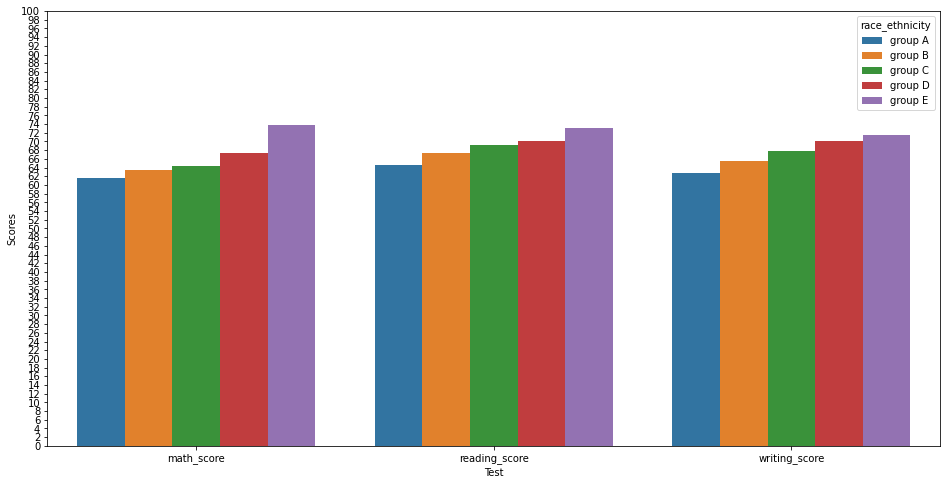

In [42]:
plt.figure(figsize=(16,8))
data = students_df.groupby('race_ethnicity').mean().reset_index().melt(id_vars=['race_ethnicity'],value_name='Scores', var_name='Test')
ax = sns.barplot(data= data, x='Test', y='Scores', hue='race_ethnicity')
ax.set(ylim=(0,100))
ax.set_yticks(range(0,101,2));

- It can be seen that students that are from the Group E are better at all scores.
- It can be seen that students that are from the Group A are worse at all scores.

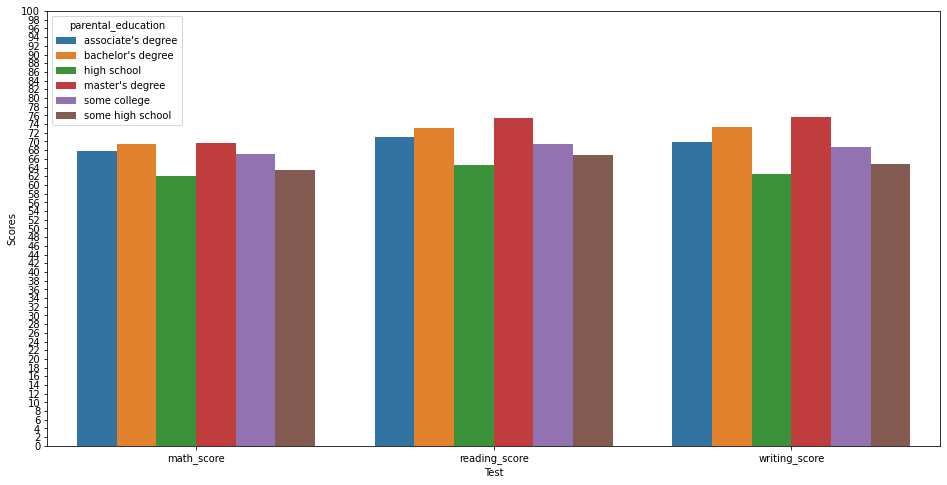

In [43]:
plt.figure(figsize=(16,8))
data = students_df.groupby('parental_education').mean().reset_index().melt(id_vars=['parental_education'],value_name='Scores', var_name='Test')
ax = sns.barplot(data= data, x='Test', y='Scores', hue='parental_education')
ax.set(ylim=(0,100))
ax.set_yticks(range(0,101,2));

- It can be seen that students whose parents' level of education are generally better.
- Students with parents that have some high school degree are better than syudent with parents that have highs school degree.

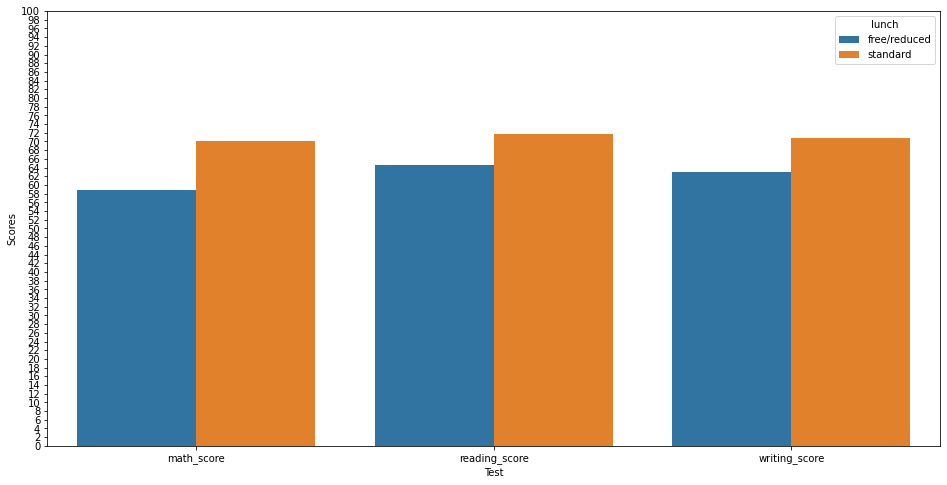

In [45]:
plt.figure(figsize=(16,8))
data = students_df.groupby('lunch').mean().reset_index().melt(id_vars=['lunch'],value_name='Scores', var_name='Test')
ax = sns.barplot(data= data, x='Test', y='Scores', hue='lunch')
ax.set(ylim=(0,100))
ax.set_yticks(range(0,101,2));

We can see that standard lunch is better for higher scores.

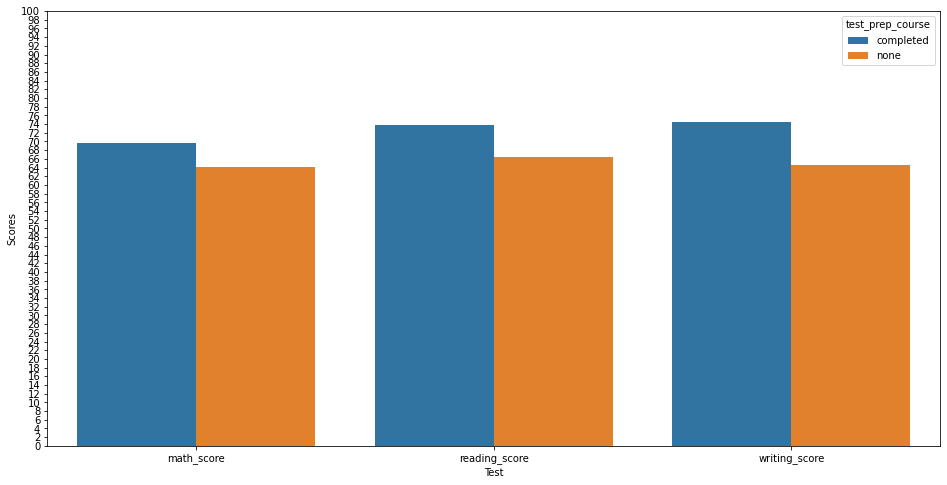

In [44]:
plt.figure(figsize=(16,8))
data = students_df.groupby('test_prep_course').mean().reset_index().melt(id_vars=['test_prep_course'],value_name='Scores', var_name='Test')
ax = sns.barplot(data= data, x='Test', y='Scores', hue='test_prep_course')
ax.set(ylim=(0,100))
ax.set_yticks(range(0,101,2));

Test preperation courses increase the grades.